In [ ]:
python -m pip install qiskit-experiments

In [ ]:
python -m pip install git+https://github.com/Qiskit/qiskit-experiments.git

In [ ]:
git clone https://github.com/Qiskit/qiskit-experiments.git
python -m pip install -e qiskit-experiments

In [1]:
from qiskit_experiments.library import T1

In [2]:
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import AerSimulator

backend = AerSimulator.from_backend(FakePerth())

In [3]:
import numpy as np

qubit0_t1 = FakePerth().qubit_properties(0).t1
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)

exp = T1(physical_qubits=(0,), delays=delays)

[1.00e-06 3.10e-05 6.10e-05 9.10e-05 1.21e-04 1.51e-04 1.81e-04 2.11e-04
 2.41e-04 2.71e-04 3.01e-04 3.31e-04 3.61e-04 3.91e-04 4.21e-04 4.51e-04
 4.81e-04 5.11e-04 5.41e-04 5.71e-04 6.01e-04]


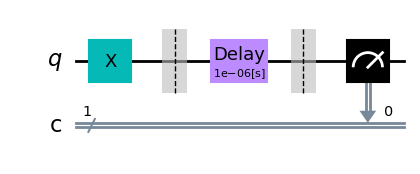

In [4]:
print(delays)
exp.circuits()[0].draw(output='mpl')

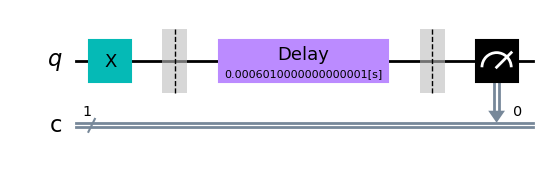

In [5]:
exp.circuits()[-1].draw(output='mpl')

In [6]:
exp_data = exp.run(backend=backend).block_for_results()

In [ ]:
exp_data = exp.run(backend=backend)

In [7]:
print(exp_data.job_status())
print(exp_data.analysis_status())

JobStatus.DONE
AnalysisStatus.DONE


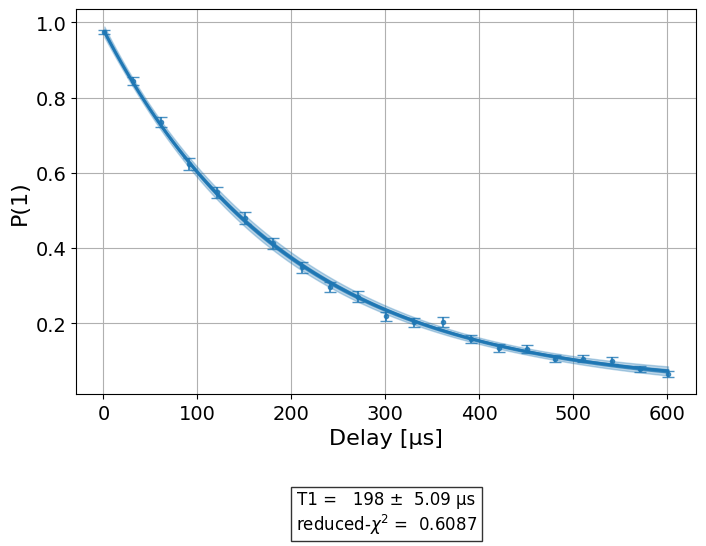

In [8]:
display(exp_data.figure(0))

In [9]:
for result in exp_data.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 18
 - chi-square: 10.956628081362243
 - reduced chi-square: 0.6087015600756802
 - Akaike info crit.: -7.662135067342296
 - Bayesian info crit.: -4.528567754172027
 - init params:
  * amp = 0.9082926829268292
  * tau = 0.00022893138482609244
  * base = 0.06585365853658537
 - fit params:
  * amp = 0.9524989430523355 ± 0.007668587656175525
  * tau = 0.00019772948453287837 ± 5.091307196951925e-06
  * base = 0.027331069821447358 ± 0.007252441758969043
 - correlations:
  * (tau, base) = -0.8930595774290394
  * (amp, base) = -0.8019089072898276
  * (amp, tau) = 0.6121672050521441
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000198+/-0.000005
- χ²: 0.6087015600756802
- quality: good
- extra: <1 it

In [10]:
print(exp_data.analysis_results("T1").value.nominal_value)
print(exp_data.analysis_results("T1").value.std_dev)

0.00019772948453287837
5.091307196951925e-06


In [11]:
print(exp_data.data(0))

{'counts': {'0': 26, '1': 998}, 'job_id': '2eb84cef-669d-4de5-9652-f198411ff92c', 'metadata': {'experiment_type': 'T1', 'qubit': 0, 'unit': 's', 'xval': 1e-06}, 'shots': 1024, 'meas_level': <MeasLevel.CLASSIFIED: 2>}


In [12]:
print(exp_data.metadata)

{'physical_qubits': [0], 'meas_level': <MeasLevel.CLASSIFIED: 2>, '_source': {'class': 'qiskit_experiments.framework.experiment_data.ExperimentData', 'metadata_version': 1, 'qiskit_version': {'qiskit-terra': '0.24.1', 'qiskit-experiments': '0.5.2'}}}


In [13]:
from qiskit.qobj.utils import MeasLevel

exp.set_run_options(shots=1000,
                    meas_level=MeasLevel.CLASSIFIED)

In [14]:
exp.set_transpile_options(scheduling_method='asap',
                          optimization_level=3,
                          basis_gates=["x", "sx", "rz"])

In [15]:
exp = T1(physical_qubits=(0,), delays=delays)
new_delays=np.arange(1e-6, 600e-6, 50e-6)
exp.set_experiment_options(delays=new_delays)

In [16]:
from qiskit_experiments.library import StandardRB

exp = StandardRB(physical_qubits=(0,),
                lengths=list(range(1, 300, 30)),
                seed=123,
                backend=backend)
exp.analysis.set_options(gate_error_ratio=None)

In [17]:
from qiskit_experiments.framework import ParallelExperiment

child_exp1 = T1(physical_qubits=(2,), delays=delays)
child_exp2 = StandardRB(physical_qubits=(3,1), lengths=np.arange(1,100,10), num_samples=2)
parallel_exp = ParallelExperiment([child_exp1, child_exp2])

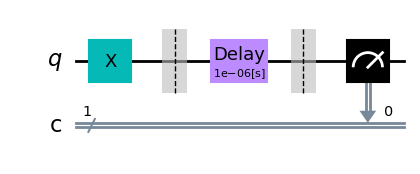

In [18]:
parallel_exp.component_experiment(0).circuits()[0].draw(output='mpl')

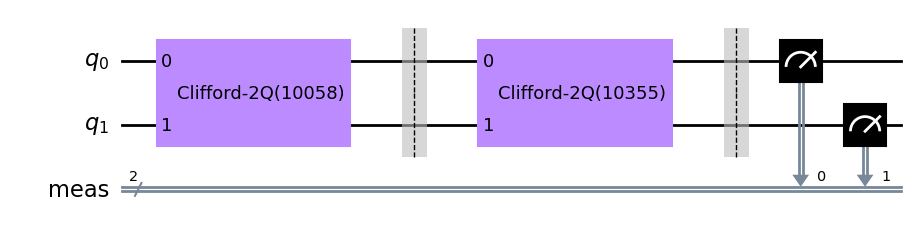

In [19]:
parallel_exp.component_experiment(1).circuits()[0].draw(output='mpl')

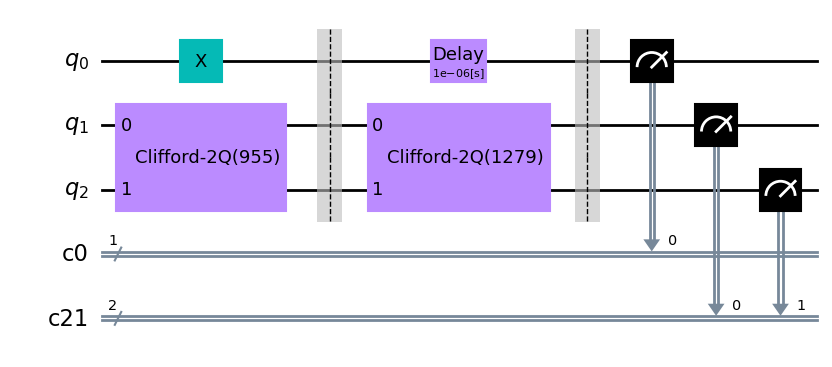

In [20]:
parallel_exp.circuits()[0].draw(output='mpl')

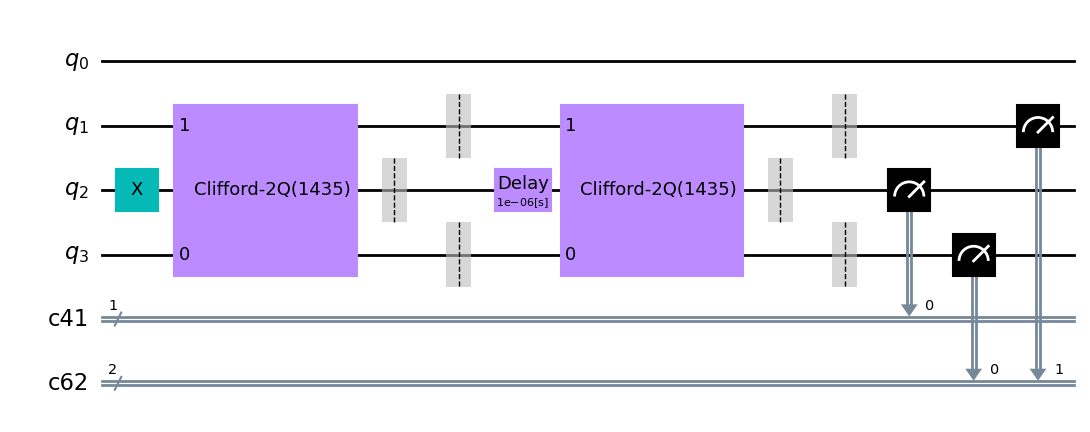

In [21]:
parallel_exp._transpiled_circuits()[0].draw(output='mpl')

Component experiment 0


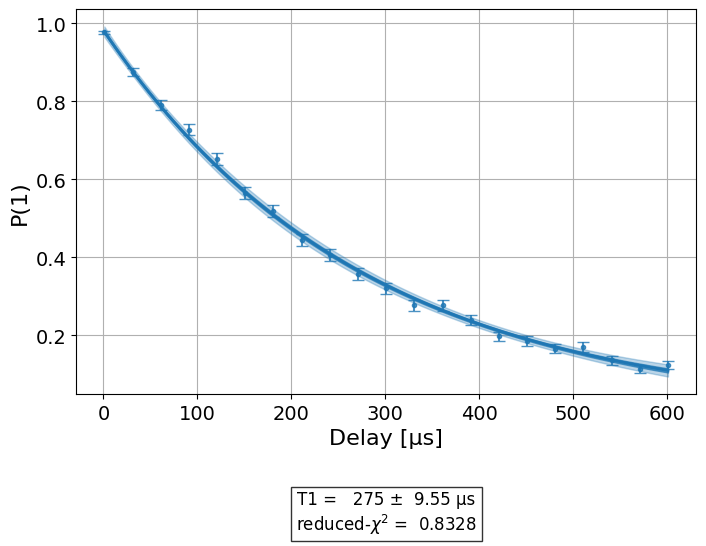

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 16
 - degree of freedom: 18
 - chi-square: 14.99046710856964
 - reduced chi-square: 0.8328037282538688
 - Akaike info crit.: -1.0792672597265147
 - Bayesian info crit.: 2.0543000534437548
 - init params:
  * amp = 0.8624390243902439
  * tau = 0.00027495318156695557
  * base = 0.11365853658536586
 - fit params:
  * amp = 0.9831526814260043 ± 0.013411316235719617
  * tau = 0.00027524683916735983 ± 9.554101968715098e-06
  * base = -0.001508447495477811 ± 0.01400543536803856
 - correlations:
  * (tau, base) = -0.9497988208832694
  * (amp, base) = -0.9480441050504532
  * (amp, tau) = 0.8574228275485212
- quality: good
- device_components: ['Q2']
- verified: False
AnalysisResult
- name: T1
- value: 0.000275+/-0.000010
- χ²: 0.8328037282538688
- quality: good
- extra: <1 it

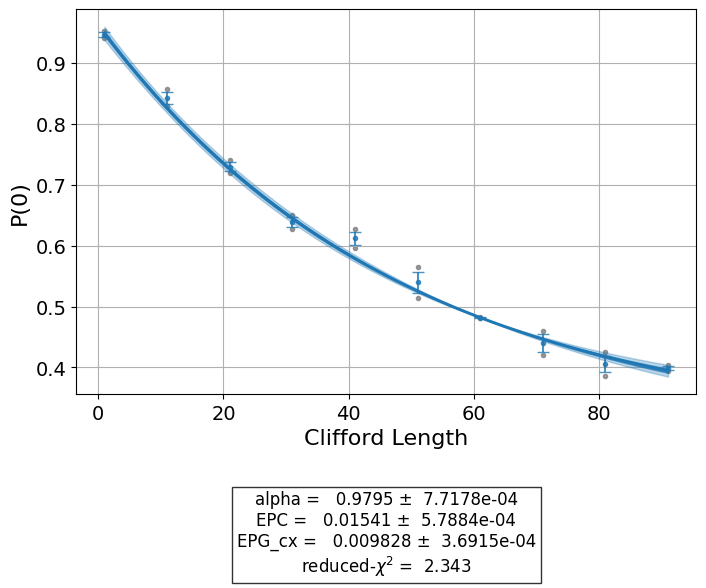

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 40
 - degree of freedom: 7
 - chi-square: 16.40185181115368
 - reduced chi-square: 2.3431216873076686
 - Akaike info crit.: 10.948091507759017
 - Bayesian info crit.: 11.855846786741154
 - init params:
  * a = 0.7083587329385075
  * alpha = 0.9830350513587631
  * b = 0.25
 - fit params:
  * a = 0.6685535681544579 ± 0.011601060571074845
  * alpha = 0.979451972791258 ± 0.0007717820500221509
  * b = 0.2936022347534093 ± 0.012075858976140849
 - correlations:
  * (alpha, b) = -0.9925901555355596
  * (a, b) = -0.9480910846949453
  * (a, alpha) = 0.9043509688225234
- quality: good
- device_components: ['Q3', 'Q1']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9795+/-0.0008
- χ²: 2.3431216873076686
- quality: good
- device_components: ['Q3', 'Q1']
- verified: False
Anal

In [22]:
parallel_data = parallel_exp.run(backend, seed_simulator=101).block_for_results()

for i, sub_data in enumerate(parallel_data.child_data()):
    print("Component experiment",i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)

In [23]:
parallel_exp = ParallelExperiment(
    [T1(physical_qubits=(i,), delays=delays) for i in range(2)], flatten_results=True
)
parallel_data = parallel_exp.run(backend, seed_simulator=101).block_for_results()

for result in parallel_data.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 18
 - chi-square: 17.660924794778527
 - reduced chi-square: 0.9811624885988071
 - Akaike info crit.: 2.3634745770477017
 - Bayesian info crit.: 5.497041890217972
 - init params:
  * amp = 0.8868292682926829
  * tau = 0.0002271730081996997
  * base = 0.07560975609756097
 - fit params:
  * amp = 0.9564811846426179 ± 0.0082819324503592
  * tau = 0.00020750135839939723 ± 5.655591182883683e-06
  * base = 0.01647956442194187 ± 0.007946446929193177
 - correlations:
  * (tau, base) = -0.9066069085701004
  * (amp, base) = -0.7740940384512158
  * (amp, tau) = 0.5835986104811164
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000208+/-0.000006
- χ²: 0.9811624885988071
- quality: good
